Loading the Data

# Goal: find the best multiple-layer neural network models (tensorflow) to predict early-stage diabetic risk.
# Dataset: https://www.kaggle.com/datasets/tanshihjen/early-stage-diabetes-risk-prediction
# Steps:
## Convert categorical data to numerical data.
## Check any correlation between the data attributes.
## Data normalization via the onehot transformation.
## Use the randomized search to find the best hyperparameters.
## Use the hyperparameters to construct the best model.
## Train and test the model (split the dataset into 80/20 for training and testing and further split the 80 into 80/20 for training and validation)
## Use the model to predict.
# Result:
## Best parameters:
### no of hidden layers: 3
### no of neurons in each hidden layer: 17
### learning rate: 0.1
## Test Performance Metrics
### Accuracy: 0.9615384615384616
### Precision: 0.96875
### Recall: 0.96875
### F1 Score: 0.96875¶

In [11]:
import pandas as pda

#Loading data from csv
diabetes_df = pda.read_csv('diabetes_risk_prediction_dataset.csv')

#Converting categorical data into intial numerical data to compute correlations.  Leter will apply onehot transformation
diabetes_df['Gender'].replace(['Male', 'Female'], [0, 1], inplace=True)
diabetes_df['Polyuria'].replace(['No', 'Yes'], [0, 1], inplace=True)
diabetes_df['Polydipsia'].replace(['No', 'Yes'], [0, 1], inplace=True)
diabetes_df['sudden weight loss'].replace(['No', 'Yes'], [0, 1], inplace=True)
diabetes_df['weakness'].replace(['No', 'Yes'], [0, 1], inplace=True)
diabetes_df['Polyphagia'].replace(['No', 'Yes'], [0, 1], inplace=True)
diabetes_df['Genital thrush'].replace(['No', 'Yes'], [0, 1], inplace=True)
diabetes_df['visual blurring'].replace(['No', 'Yes'], [0, 1], inplace=True)
diabetes_df['Itching'].replace(['No', 'Yes'], [0, 1], inplace=True)
diabetes_df['Irritability'].replace(['No', 'Yes'], [0, 1], inplace=True)
diabetes_df['delayed healing'].replace(['No', 'Yes'], [0, 1], inplace=True)
diabetes_df['partial paresis'].replace(['No', 'Yes'], [0, 1], inplace=True)
diabetes_df['muscle stiffness'].replace(['No', 'Yes'], [0, 1], inplace=True)
diabetes_df['Alopecia'].replace(['No', 'Yes'], [0, 1], inplace=True)
diabetes_df['Obesity'].replace(['No', 'Yes'], [0, 1], inplace=True)
diabetes_df['class'].replace(['Negative', 'Positive'], [0, 1], inplace=True)
diabetes_df

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,0,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,0,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,0,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,1,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,48,1,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,58,1,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,32,1,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


Attribute Correlation 

<Axes: >

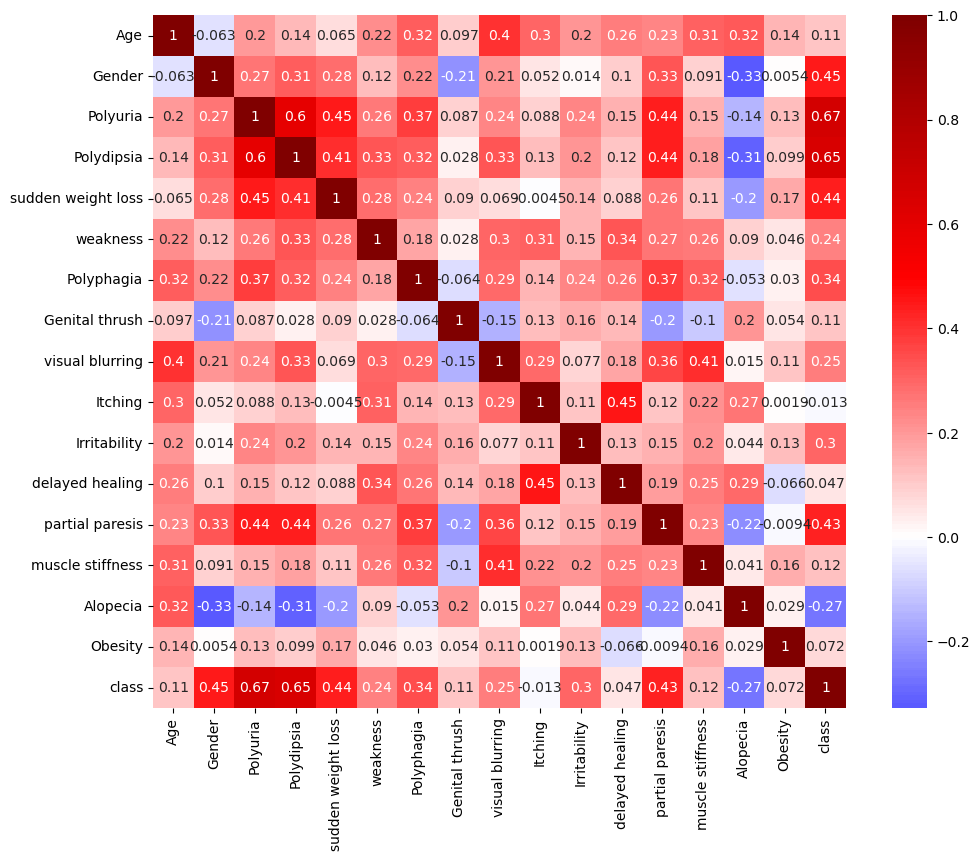

In [12]:
import matplotlib.pyplot as plot
import seaborn as sb

plot.figure(figsize = (12, 9))
corrMatrix = diabetes_df.corr()
sb.heatmap(corrMatrix, square = True, annot = True, center = 0, cmap = 'seismic')

Help Functions

In [13]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

#attribute normalization functions
def attribute_normalization():
    scaler = MinMaxScaler()
    ohe = OneHotEncoder(sparse_output = False)

    column_transform = make_column_transformer((scaler, ['Age']), 
                                               (ohe,['Gender','Polyuria','Polydipsia', 'sudden weight loss', 'weakness',
                                                     'Polyphagia', 'Genital thrush', 'visual blurring', 'Itching', 
                                                     'Irritability', 'delayed healing', 'partial paresis', 
                                                     'muscle stiffness', 'Alopecia', 'Obesity']))

    return column_transform


def add_generated_attribute_desc(X) :
    df = pda.DataFrame(X, columns = ['Age', 'Gender0','Gender1','Polyuria0','Polyuria1', 'Polydipsia0', 'Polydipsia1', 'sudden weight loss0', 'sudden weight loss1',
                                    'weakness0','weakness1','Polyphagia0', 'Polyphagia1', 'Genital thrush0', 'Genital thrush1',
                                    'visual blurring0', 'visual blurring1', 'Itching0', 'Itching1','Irritability0', 'Irritability1', 
                                    'delayed healing0', 'delayed healing1','partial paresis0', 'partial paresis1',
                                    'muscle stiffness0', 'muscle stiffness1', 'Alopecia0', 'Alopecia1', 'Obesity0', 'Obesity1'])
    return df


Evaluate NN with Optimal Hyperparameters

In [ ]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, InputLayer
from keras.callbacks import EarlyStopping

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from scikeras.wrappers import KerasClassifier

X = diabetes_df.iloc[:,0:16]
y = diabetes_df.iloc[:,16]

# Data normalization
transformer = attribute_normalization()
XX = transformer.fit_transform(X)

# Split data into train, test and validation
X_trainAll, X_test, y_trainAll, y_test = train_test_split(XX, y, test_size = 0.2)
X_train, X_valid, y_train, y_valid = train_test_split(X_trainAll, y_trainAll, test_size = 0.2)
X_train_df = add_generated_attribute_desc(X_train)
X_valid_df = add_generated_attribute_desc(X_valid)
X_test_df = add_generated_attribute_desc(X_test)

# set up NN model
def setup_model(no_hidden = 1, no_neurons = 10, learning_rate = 0.001):
    model = Sequential()
    model.add(keras.Input(shape=(31,)))
    #hidden layers
    for layer in range(0, no_hidden):
        model.add(keras.layers.Dense(units=no_neurons, activation = 'relu', kernel_initializer = 'random_normal',
                                    bias_initializer = 'zeros'))
    #output layer
    model.add(keras.layers.Dense(units=1, activation = 'sigmoid', kernel_initializer = 'random_normal',
                                bias_initializer = 'zeros'))
    #configure the mnodel for training
    model.compile(loss = 'binary_crossentropy', optimizer = 'adamax', metrics = [keras.metrics.Recall(), keras.metrics.Precision()])
    return model

# set up early stop
es = EarlyStopping(monitor = 'val_loss', min_delta = 0.001, mode = 'min', verbose = 1, patience = 50)

# set up pipeline
pipeline = Pipeline([('diabetes_nn', KerasClassifier(learning_rate=0.1, no_hidden = 1, no_neurons = 10, 
                                                    model = setup_model, epochs = 100, batch_size = 5, verbose = 1))])

# Set up the search space for the hyperparameters 
params = {"diabetes_nn__no_hidden": [2, 3], "diabetes_nn__no_neurons": range(8, 20), "diabetes_nn__learning_rate": [0.0001, 0.001, 0.01, 0.05, 0.1]}

# Randomly searching best hyperparameters
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

search = RandomizedSearchCV(estimator=pipeline, param_distributions=params, n_iter = 10, cv = 5, error_score='raise')
model = search.fit(X_train_df, y_train, diabetes_nn__validation_data = (X_valid_df, y_valid), 
                   diabetes_nn__callbacks = [es])

# Get the optimal parameters
print("Best parameters:")
print(model.best_params_)

# Test model
y_pred = model.predict(X_test_df)
y_pred = (y_pred > 0.5)

# Calculate test scores
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)